In [1]:
import io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image
import pandas as pd

num_shapes=25
num_noise=700

im_size=160
max_radius=8
min_radius=4

noise_line=6

fig, ax = plt.subplots()
plt.gray()
plt.axis('scaled')
plt.axis('off')
plt.subplots_adjust(bottom=0.0, left=0.0, right=1.0, top=1.0)


plt.xlim([0, im_size])
plt.ylim([0, im_size])

lnw = 0.15
lnw_noise = 0.1

rng=np.random.default_rng(100)
shape=rng.integers(2,5,size=num_shapes)
shape[shape==2] = 0
params=rng.random((num_shapes,4))
params_rel = np.zeros((num_shapes,5))

noise_params=rng.random((num_noise,4))

scale=[1.3,1.25]

for i, s in enumerate(shape):
  r = min_radius+params[i,0]*(max_radius-min_radius)
  pos = params[i,1:3]*(im_size-2*r)+r
  if s == 0:
    params_rel[i] = (pos[0],pos[1],r,s,0)
    patch = matplotlib.patches.Circle(pos, radius=r, lw=lnw, fc='k', fill=False)
    ax.add_patch(patch)
  else:
    r = r * scale[s-3]
    a = params[i,3]*2*np.pi/s
    params_rel[i] = (pos[0],pos[1],r,s,a)
    patch = matplotlib.patches.RegularPolygon(pos,numVertices=s,radius=r,orientation=a,lw=lnw,fc='k',fill=False)
    ax.add_patch(patch)

for p in noise_params:
  x=p[0:2]*im_size
  y=x+(p[2:5]-0.5)*2*noise_line
  line = matplotlib.lines.Line2D([x[0],y[0]],[x[1],y[1]],lw=lnw_noise,c='k')
  ax.add_line(line)

plt.show()

fig.set(figwidth=1, figheight=1, dpi=im_size)
fig.savefig('drive/MyDrive/task.png', transparent=False)
#img_buf = io.BytesIO()
#fig.savefig(img_buf, format='png', transparent=False)
#img = Image.open(img_buf).convert('L')
#arr = np.asarray(img)

params_rel[:,0:3] = params_rel[:,0:3]/im_size
params_rel[:,3] = shape

df = pd.DataFrame(params_rel, columns=['pos_x','pos_y','radius','shape','angle'])
df.to_csv('drive/MyDrive/task.csv', float_format='%.6f')

ModuleNotFoundError: No module named 'numpy'

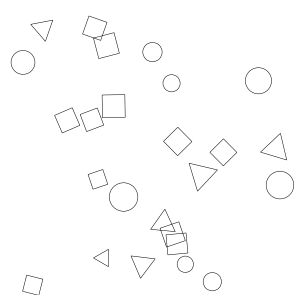

In [29]:
fig, ax = plt.subplots()
plt.axis('scaled')
plt.axis('off')
plt.subplots_adjust(bottom=0.0, left=0.0, right=1.0, top=1.0)

plt.xlim([0, im_size])
plt.ylim([0, im_size])

lnw = 0.5

shape = params_rel

for s in shape:
  v, a = s[3:5]
  s = s*im_size
  if v == 0:
    patch = matplotlib.patches.Circle(s[0:2], radius=s[2], lw=lnw, fc='b', fill=False)
    ax.add_patch(patch)
  else:
    patch = matplotlib.patches.RegularPolygon(s[0:2],numVertices=v,radius=s[2],orientation=a,lw=lnw,fc='b',fill=False)
    ax.add_patch(patch)

plt.show()

In [ ]:
img = Image.open('drive/MyDrive/to.png').convert('L')
img = np.asarray(img)

tile_size = 32

tiles = [img[x:x+tile_size,y:y+tile_size] for x in range(0,im_size,tile_size) for y in range(0,im_size,tile_size)]

matplotlib.image.imsave('drive/MyDrive/10.png', tiles[10],dpi=tile_size)


In [44]:
df

,pos_x,pos_y,radius,shape,angle
0,0.592014,0.532462,0.049407,4.0,1.564163
1,0.750670,0.494600,0.046936,4.0,1.567143
2,0.404097,0.339542,0.049466,0.0,0.000000
3,0.674208,0.416748,0.058478,3.0,0.816322
4,0.618397,0.106030,0.028291,0.0,0.000000
5,0.054864,0.806831,0.041403,0.0,0.000000
6,0.543003,0.248032,0.049534,3.0,2.002196
7,0.504392,0.842751,0.033524,0.0,0.000000
8,0.124225,0.924247,0.045003,3.0,1.234787
9,0.589460,0.176651,0.049443,4.0,0.879722
